<a href="https://colab.research.google.com/github/shahin1009/ModelOrderReduction/blob/main/Python_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Practicing with Python**

<mark>**Exercise 1**</mark></br>
Draw the graph of the function $y=\sin(x^2)$ for $x\in[0,2\pi]$.

Text(0, 0.5, 'sin(x)')

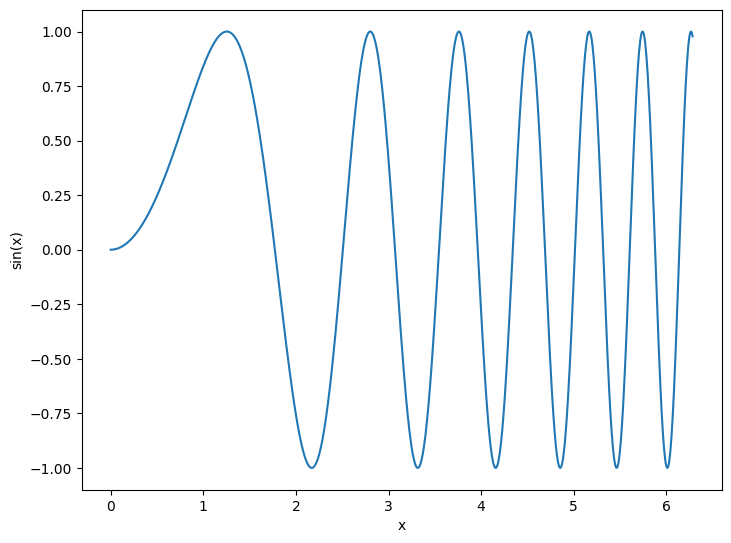

In [ ]:
x = np.linspace(0,2*np.pi,1000)
y = np.sin(x**2)

figure = plt.figure()
axes = figure.add_axes([0,0,1,1])
axes.plot(x,y)
axes.set_xlabel('x')
axes.set_ylabel('sin(x)')


<mark>**Exercise 2**</mark></br>
Write a function called $\texttt{num2p}$ that, given a numerical value $x$, returns a string with its percentage representation. That is:

    num2p(0.57) --> '57.00%'
    num2p(0.011) --> '1.10%'

In [ ]:
def num2p(x):
    return f'{float(x*100)}%'

print(num2p(1.10))


110.00000000000001%


<mark>**Exercise 3**</mark></br>
Write a function called $\texttt{Jacobian}$ that, given two values $x$ and $y$, returns the matrix

$$J = \left[\begin{array}{cc}\sin(y)e^x & \cos(y)e^x \\ 2x-1 & 0\end{array}\right].$$

In [ ]:

def Jacobian(x,y):
    J = np.zeros([2,2])
    J[0,0]=np.sin(y)*np.exp(x)
    J[0,1]=np.cos(y)*np.exp(x)
    J[1,0]=2*x-1
    J[1,1]=0
    return J

x,y = np.pi/3,1
Jacobian(x,y)



array([[2.39790108, 1.53967458],
       [1.0943951 , 0.        ]])

<mark>**Exercise 4**</mark></br>
Define a function called $\texttt{randomStep}$ that, given a value $x$, returns $x+\delta$, with $\delta$ being a random value between -1 and 1. Try then callind "randomStep(0)" several times, as to verify that the output changes from time to time.

*Hint: exploit the function numpy.random.rand, which generates a random value in [0,1].*

In [ ]:
def randomStep(x):
    delta = 2* np.random.rand() - 1
    return x+delta
x=2
for i in np.arange(3):
    print(randomStep(x))






2.541350595608537
2.212428989286195
2.8612491424658355


<mark>**Exercise 5**</mark></br>
Let's say we would like to use the function at Ex. 4 to construct a *random walk*, that is: starting from a given $x_{0}\in\mathbb{R}$, we define

<p align="center">
$ x_{1}=\texttt{randomStep}(x_{0}) $
</p>


then $x_{2}=$ randomStep($x_{1}$) and so on. In general, one can prove that, at some point $|x_{n}|\ge10$ for some $n$. Given the stochasticity of the system, however, this event can happen immediately or after some time.
 </br>
 </br>
 Write a function called $\texttt{waitingTime}$ that, given $x_{0}$, returns the first $n$ for which $|x_{n}|\ge10.$ Verify that, even when starting from a fixed $x_{0}$, the value of such $n$ is still random.

In [ ]:
def waitingTime(x0):
    n=0
    x=x0
    while x<10:
        x=randomStep(x)
        n+=1

    return n

for i in np.arange(10):
    print(waitingTime(2))




180
185
37
124
91
326
286
582
1832
193


<mark>**Exercise 6**</mark></br>
Create a function called $\texttt{find}$ that, given a vector $\mathbf{v}$ (1D numpy.array) and a value $x$, returns the first index $i$ for which the $i$th entry of $\mathbf{v}$ equals $x$. If $x$ does not appear among the elements in $\mathbf{v}$, the function should raise an error. Namely,

    v = np.array([1,2,0,4,-1,0,8])
    find(v, 0) ---> 2
   
    v = np.array([3,-2,5,4])
    find(v, 0) ---> ERROR: the vector does not contain the required value.

*Hint 1: carefull with machine precision! To make thigs "more precisely", instead of using "==" try using the function numpy.isclose (with default values, or using a tollerance of your choice).*

*Hint 2: to raise a Python error, rather than simply printing something, you can use the syntax*

    raise RuntimeError('ERROR: the vector does not contain the required value.')

In [ ]:
def find(v,x):
    index = -1
    for i,value in enumerate(v):
        if np.isclose(value,x):
            index = i

    if index==-1:
        raise RuntimeError('ERROR: the vector does not contain the required value.')
    return index

print('The first example:')
print(find(np.array([1,2,3,4,5]),4))
print('The second example:')
print(find(np.array([1,2,3,4,5]),6))




The first example:
3
The second example:


RuntimeError: ERROR: the vector does not contain the required value.

In [ ]:
def find2(v,x):
    indices = np.where(np.isclose(v,x))[0]
    if indices.size==0:
        raise RuntimeError('ERROR: the vector does not contain the required value.')
    return indices[0]

print('The first example:')
print(find2(np.array([1,2,3,4,5]),4))
print('The second example:')
print(find2(np.array([1,2,3,4,5]),6))

The first example:
3
The second example:


RuntimeError: ERROR: the vector does not contain the required value.

<mark>**Exercise 7**</mark></br>
Draw the unit circle.

(-1.099965731583572, 1.099965731583572, -1.09986915899354, 1.0999937694758828)

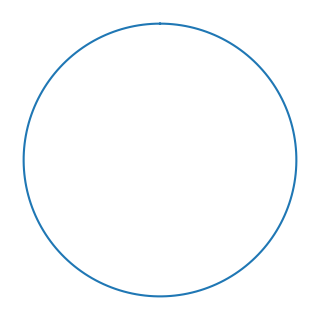

In [ ]:
theta = np.linspace(0,2*np.pi,200)
r = 1

x = r*np.sin(theta)
y = r*np.cos(theta)


figure = plt.figure(figsize=(3,3))
axes = figure.add_axes([0,0,1,1])
axes.plot(x,y)
axes.axis('off')




<mark>**Exercise 8**</mark></br>
Write a function called $\texttt{minij}$ that, given a matrix

$$\mathbf{A}=\left[\begin{array}{cccc}a_{1,1} & ... & a_{1,p}\\.. & ... & ...\\a_{d,1} & ... & a_{d,p}\end{array}\right]$$

returns the indexes $i,j$ corresponding to the smallest value in $\mathbf{A}$.

*Hint: there are at least two approaches. The first one, is to run a double for loop, scanning all the elements in the matrix. The second one, which is more "numpy-style", is to exploit the functions **numpy.argmin** and **numpy.unravel_index** (to figure out how they work, use the help commend and/or mess around with them a little). In general, the second approach is far more efficient (furthermore, it can be implemented using a single line of code!).*

In [ ]:
def minij(A):
    return np.unravel_index(np.argmin(A),A.shape)
np.argmin
A = np.array([[9,8,7],[2,3,1],[4,5,6]])
print(minij(A))

(1, 2)


In [ ]:
help(np.unravel_index)

Help on function unravel_index in module numpy:

unravel_index(...)
    unravel_index(indices, shape, order='C')
    
    Converts a flat index or array of flat indices into a tuple
    of coordinate arrays.
    
    Parameters
    ----------
    indices : array_like
        An integer array whose elements are indices into the flattened
        version of an array of dimensions ``shape``. Before version 1.6.0,
        this function accepted just one index value.
    shape : tuple of ints
        The shape of the array to use for unraveling ``indices``.
    
        .. versionchanged:: 1.16.0
            Renamed from ``dims`` to ``shape``.
    
    order : {'C', 'F'}, optional
        Determines whether the indices should be viewed as indexing in
        row-major (C-style) or column-major (Fortran-style) order.
    
        .. versionadded:: 1.6.0
    
    Returns
    -------
    unraveled_coords : tuple of ndarray
        Each array in the tuple has the same shape as the ``indices``
 

<mark>**Exercise 9**</mark></br>
Write a function called $\texttt{closestOnes}$ that, given two arrays $\mathbf{x}=[x_{1},\dots,x_{d}],\;\mathbf{y}=[y_{1},\dots,y_{p}]$, returns the two entries $x_{i}$ ed $y_{j}$ which are closest, in the sense that $|x_i-y_j|$ is minimal. In other words:

     closestOnes([5.0, 7.0, -2.3, 1.4], [4.1, 0.0]) --> 5.0, 4.1
     closestOnes([0.0, 1.9, 3.0, 8.3], [9.0, 5.0, -1.7]) --> 8.3, 9.0

*Hint: if x and y are 1D numpy.arrays, try computing x.reshape(-1,1)  - y.reshape(1,-1). What do you get? Can you exploit this, maybe in conjunction with the function defined in Ex. 8?*

In [ ]:
def closestOnes(x,y):
    x = np.array(x)
    y = np.array(y)
    distances = np.abs(x.reshape(-1,1)-y.reshape(1,-1))
    ind = minij(distances)

    return x[ind[0]] ,y[ind[1]]

In [ ]:

x=np.array([5.0, 7.0, -2.3, 1.4])
y=np.array([4.1, 0.0])
print(closestOnes([5.0, 7.0, -2.3, 1.4], [4.1, 0.0]) )
print(closestOnes([0.0, 1.9, 3.0, 8.3], [9.0, 5.0, -1.7]))

(5.0, 4.1)
(8.3, 9.0)


<mark>**Exercise 10**</mark></br>
Write a function called $\texttt{plotSquare}$ that, given $x,y,h$ and a string $c$, draws a square with vertices

$$\begin{array}{lll}A=(x,y), & & B = (x+h, y)\\
C=(x+h,y+h),&& D = (x, y+h),\end{array}$$

coloring the inner region with the color $c$. For instance, the call:

    plt.figure(figsize = (3,3))
    plotSquare(0, 0, 1, c = 'red')
    plt.show()

should draw a red unit square, with bottom-left vertix lying at the origin.

*Hint 1: use the **fill** function in matplotlib.pyplot.*

*Hint 2: do not use plt.figure(), plt.title() and plt.show() while defining "plotSquare". If needed, these will be called by the user, as in the example above.*

In [ ]:
def plotSquare1(x,y,h,c='blue'):
    A = (x,y)
    B = (x+h,y)
    C = (x+h,y+h)
    D = (x,y+h)
    # plt.plot(A,B,B,C,C,D,D,A)
    plt.fill(A,B,B,C,C,D,D,A,color=c)

def plotSquare(x, y, h, c='blue'):
    # Define square vertices
    X = [x, x + h, x + h, x, x]  # X-coordinates
    Y = [y, y, y + h, y + h, y]  # Y-coordinates

    plt.fill(X, Y, color=c)  # Fill the square with color


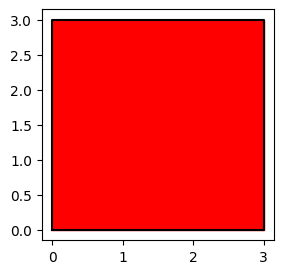

In [ ]:
x=0
y=0
h=3
plt.figure(figsize=(3,3))
plotSquare(x,y,h,c='red')
# plt.plot((0,0),(1,0),(1,1),)
plt.show()




<mark>**Exercise 11**</mark></br>
Leveraging on the function defined in Ex. 10, draw an 8x8 chessboard.

*Hint 1: use a double FOR loop!*

*Hint 2: you can use the colors 'saddlebrown' and 'tan'. Finally, if you wish, you hide the coordinate axis with plt.axis("off").*

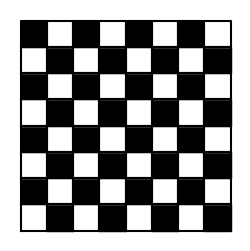

In [ ]:
x=0
y=0
h=3
plt.figure(figsize=(3,3))

for i in np.arange(8):
    for j in np.arange(8):
      if (i+j)%2==0:
        c='white'
      else:
        c='black'

      plotSquare(x+i*h,y+j*h,h,c)
plt.axis('off')
plt.gca().set_aspect('equal')
plt.show()

